<a href="https://colab.research.google.com/github/Colsai/Small-Assignments/blob/main/word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Wordcloud Maker
### Reference: https://www.datacamp.com/community/tutorials/wordcloud-python

In [3]:
!pip install pillow
!pip install wordcloud

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [9]:
#Import the file
file = "/content/drive/MyDrive/anime/anime.csv"
df = pd.read_csv(file)

In [10]:
df.head()

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009.0,2010.0,Spring,The foundation of alchemy is based on the law ...,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707.0,14351,25810,2656,4.702,86547.0
1,your name.,Movie,1.0,107.0,False,2016.0,2016.0,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831.0,1453,21733,124,4.663,43960.0
2,A Silent Voice,Movie,1.0,130.0,False,2016.0,2016.0,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892.0,946,17148,132,4.661,33752.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,2016.0,2016.0,Fall,"Picking up where the second season ended, the ...",['Production I.G'],"['Shounen', 'Sports', 'Animeism', 'School Club...",[],25134.0,2183,8082,167,4.660,17422.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,2019.0,2019.0,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],"['Action', 'Fantasy', 'Horror', 'Shounen', 'Da...","['Cannibalism', 'Explicit Violence']",21308.0,3217,7864,174,4.650,15789.0


In [12]:
desc_df = df[["title", "description", "rating"]]

In [13]:
desc_df.groupby("rating")

In [14]:
desc_df.head()

,title,description,rating
0,Fullmetal Alchemist: Brotherhood,The foundation of alchemy is based on the law ...,4.702
1,your name.,Mitsuha and Taki are two total strangers livin...,4.663
2,A Silent Voice,"After transferring into a new school, a deaf g...",4.661
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,"Picking up where the second season ended, the ...",4.660
4,Attack on Titan 3rd Season: Part II,The battle to retake Wall Maria begins now! Wi...,4.650


In [15]:
desc_df.describe()

,rating
count,12107.000000
mean,2.948697
std,0.827642
min,0.844000
25%,2.303500
50%,2.965000
75%,3.615500
max,4.702000


In [16]:
text = desc_df.description[0]

In [17]:
text

"The foundation of alchemy is based on the law of equivalent exchange; you cannot produce something from nothing. As such, alchemy is bound by one taboo - human transmutation. Four years ago two young brothers, Edward and Alphonse Elric, broke this taboo when they tried to resurrect their dead mother. During the process Al's body disintegrated and Ed lost his leg. In a desperate attempt to prevent his brother from disappearing completely, Ed sacrificed one of his arms so he could affix Al's soul to a suit of armor. When his missing limbs are replaced by auto mail parts, Ed bears the name of the Fullmetal Alchemist - the youngest ever State Alchemist and dog of the military. Now, alongside his brother, Ed uses his status within the military to attempt to find any way that he can return their bodies back to their original state."

In [18]:
wordcloud = WordCloud().generate(text)

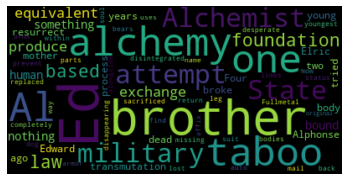

In [19]:
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [35]:
#How many null values would we need to drop?
desc_df.dropna().shape[0] - desc_df.shape[0]

-6945

In [36]:
desc_df = desc_df.dropna()

In [54]:
for element in desc_df['description']:
    all_desc.append(element)

full_desc = "".join(element for element in desc_df['description'])

In [69]:
#This sets words that will be ignored
stopwords = set(STOPWORDS)
stopwords.update(["will", 
                  "one", 
                  "find", 
                  "live", 
                  "life", 
                  "world",
                  "new",
                  "now"])

In [70]:
#Now let's look at the wordcloud here
wordcloud2 = WordCloud(stopwords=stopwords).generate(full_desc)

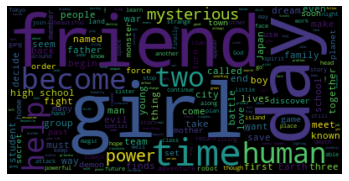

In [73]:
#Let's make a simple wordcloud here
plt.imshow(wordcloud2, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [51]:
#How many 
df['tags'].notnull().agg('sum')

14578

In [75]:
anime_mask = np.array(Image.open("/content/487-4873406_black-and-white-anime-png-picture-anime-girl.png"))

In [76]:
anime_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [89]:
wc = WordCloud(background_color="white", max_words=5000, mask=anime_mask,
               stopwords=stopwords, contour_width=3, contour_color='black')

In [90]:
wc.generate(full_desc)

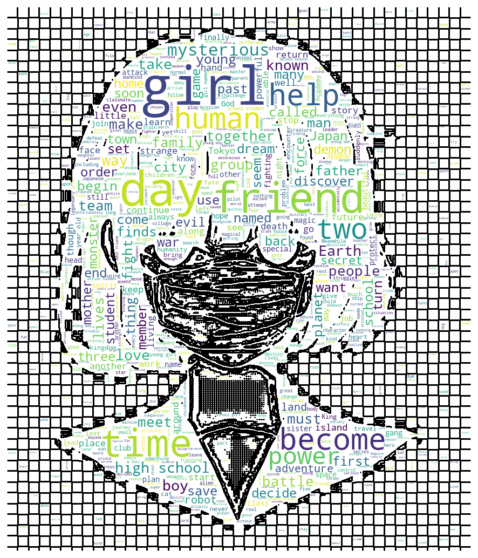

In [91]:
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [92]:
wc.to_file("wordcloud.png")